# Start by importing the necessary modules that i will be using in this project

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt


# looking for datasets available in the working folder

In [4]:
path='C:/Users/kelvin/Desktop/monthly'
files=[file for file in os.listdir(path)]
excel_files=[]# a list of all datasets i'll be working with
for file  in files:
    if ".xlsx" in file:
        excel_files.append(file)
        print(file)

05 sales data.xlsx
06 sales data.xlsx
07 sales data.xlsx
08 sales data.xlsx
09 sales data.xlsx
10 sales data.xlsx
11 sales data.xlsx
12 sales data.xlsx


# merging all the excel files to come up with one file 

In [8]:
all_data=pd.DataFrame()# the finall dataframe after merging all the data frames
for file in excel_files:
    df=pd.read_excel(file)
    all_data=pd.concat([all_data,df])# concatinating all the dataframes to one
    all_data.to_excel("all sales .xlsx",index=False) #saving the final dataframe

# let's now work with "all sales.xlsx"

In [9]:
df=pd.read_excel('all sales .xlsx')
df.head()

,Product,Order Date,Purchase Address,price,order_id,quantity_ordered,order_date,month
0,Wired Headphones,05/16/19 17:14,"669 2nd St, New York City, NY 10001",11.99,194095,1,05/16/19 17:14,5
1,AA Batteries (4-pack),05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",3.84,194096,1,05/19/19 14:43,5
2,27in FHD Monitor,05/24/19 11:36,"164 Madison St, New York City, NY 10001",149.99,194097,1,05/24/19 11:36,5
3,Wired Headphones,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",11.99,194098,1,05/02/19 20:40,5
4,AAA Batteries (4-pack),05/11/19 22:55,"17 Church St, Seattle, WA 98101",2.99,194099,2,05/11/19 22:55,5


# adding some additional columns ie .total, city and street

In [14]:
#total column
df['Total']=df['price']*df['quantity_ordered']
#city column
df['city']=df['Purchase Address'].astype(str).apply(lambda x:x.split(",")[1])
#street column
df['street']=df['Purchase Address'].astype(str).apply(lambda x:x.split(",")[0]).astype(str).apply(lambda y:y.split(" ")[1])
#saving our new dataset
df.to_excel("all sales .xlsx",index=False)

In [16]:
##Here is the new look of our dataset
df.head()

,Product,Order Date,Purchase Address,price,order_id,quantity_ordered,order_date,month,Total,city,street
0,Wired Headphones,05/16/19 17:14,"669 2nd St, New York City, NY 10001",11.99,194095,1,05/16/19 17:14,5,11.99,New York City,2nd
1,AA Batteries (4-pack),05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",3.84,194096,1,05/19/19 14:43,5,3.84,Dallas,Walnut
2,27in FHD Monitor,05/24/19 11:36,"164 Madison St, New York City, NY 10001",149.99,194097,1,05/24/19 11:36,5,149.99,New York City,Madison
3,Wired Headphones,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",11.99,194098,1,05/02/19 20:40,5,11.99,Dallas,Meadow
4,AAA Batteries (4-pack),05/11/19 22:55,"17 Church St, Seattle, WA 98101",2.99,194099,2,05/11/19 22:55,5,5.98,Seattle,Church



# finding total sales based on each city

In [17]:
#Bellow lines of code replaces whitespaces on city names with underscore in order to use them as variable names
df=pd.read_excel("all sales .xlsx")
cities=df['city'].unique()
city_names=[]
for city in cities:
    #print(city)
    if " " in city:
        city_name=city.replace(" ","_")
        print(city_name.strip("_"))
        city_names.append(city_name.strip("_"))
    else:pass
    

New_York_City
Dallas
Seattle
San_Francisco
Boston
Atlanta
Austin
Los_Angeles
Portland


In [27]:
#let's initialize each city sales to zero
#city_sales_amount=0
December_total_sales=0 # sums all the city sales to one
city_sales_list=[]#stores each city total sale in a list
for city_name in city_names:
        city_name_sales=city_name+"_sales"
        city_name_sales=0
        for i in range(len(df)):
            if df.loc[i].month==12:
                city=df.loc[i].city.replace(" ","_")
                city_real=city.strip("_")
                if city_real==city_name:
                    city_name_sales+=df.loc[i].Total
        December_total_sales+=city_name_sales #adds each city_sale to The total december sales
        city_sales_list.append(city_name_sales) #appends each city total sale to the city_sales_list
        print(f"{city_name} sales ={city_name_sales.round()}sh\n")
        #saving each month sales data in a text file
       # with open("city_december_sales.txt",'a') as myfile:
         #   myfile.write(f"{city_name} sales ={city_name_sales.round()}sh\n")
          #  myfile.close()
print(f"Total December sales amounted to {December_total_sales.round()}sh")

New_York_City sales =646771.0sh

Dallas sales =380719.0sh

Seattle sales =387318.0sh

San_Francisco sales =1106601.0sh

Boston sales =509599.0sh

Atlanta sales =360899.0sh

Austin sales =233777.0sh

Los_Angeles sales =684045.0sh

Portland sales =303714.0sh

Total December sales amounted to 4613443.0sh


In [25]:
#Verifienging whether the sum of individual city sales for the month of December  is equal to the total direct summation for the month of dedember
total_dec_sales=0
for i in range(len(df)):
    if df.loc[i].month==12:
        total_dec_sales+=df.loc[i].Total
print(f"December sales amounted to {total_dec_sales.round()}sh")
with open("city_december_sales.txt",'a') as myfile:
            myfile.write(f"\nDecember sales amounted to {total_dec_sales.round()}sh\n")
            myfile.close()

December sales amounted to 4613443.0sh


# Plotting a graph of total december sales for each city , 

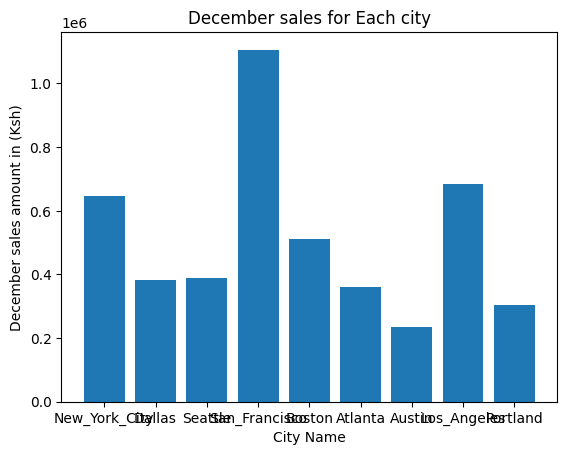

In [32]:
#Tried using a bar graph
sales=city_sales_list
cities=city_names
plt.xlabel("City Name")
plt.ylabel("December sales amount in (Ksh)")
plt.title("December sales for Each city")
plt.bar(cities,sales)
plt.show()

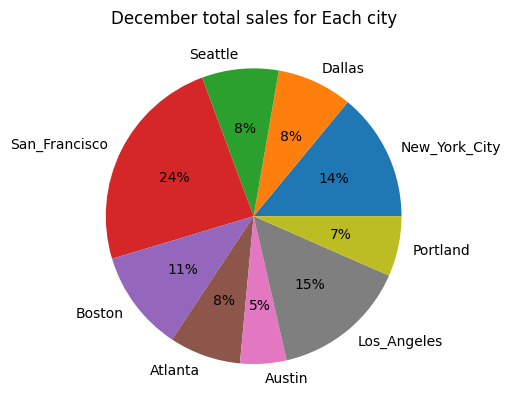

In [40]:
##Trying a piechart instead
sizes=sales
labels=cities
plt.title("December total sales for Each city")
plt.pie( sizes,labels=labels,autopct='%1.f%%')
plt.show()